In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Datos Atípicos
Un valor atípico es una observación que se aleja demasiado de la moda; esta muy lejos de la tendencia principal del resto de los datos. Pueden ser causados por errores en la recolección de datos o medidas inusuales. Generalmente se recomienda eliminarlos del conjunto de datos. Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.

In [2]:
total=pd.read_excel("TOTAL.xlsx",index_col=0)
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,0,0,4,0,...,11257778,11907721,25885,84,0,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,0,7,11,0,1,...,1554335,1566400,0,0,18,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,0,33,32,2,1,...,86282095,85785462,262072,2,65,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,0,5,5,1,1,...,7892838,7892838,0,36,10,3682753,4038309,0,0,8600884


En esta sección se realiza un gráfico de cajas de las variables de estudio utilizando la función boxplot() Ver archivo Diagramas de caja de variables seleccionadas en la investigación

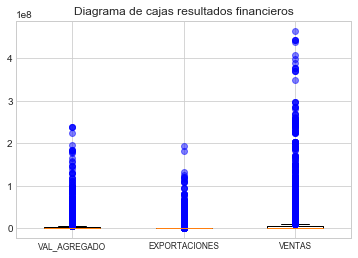

In [37]:
k=plt.boxplot([total.VAL_AGREGADO,total.EXPORTACIONES,total.VENTAS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small")
plt.title("Diagrama de cajas resultados financieros");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas resultados financieros.png")

Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna

# Forma 1

9621 filas

In [57]:
from scipy import stats     #Los datos estan dentro de 3 desviaciones estándar de la media
totalfiltrado=total[(np.abs(stats.zscore(total)) < 3).all(axis=1)]
totalfiltrado

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987459,987459,8,1410,2016,1,1,0,0,3,0,...,1290356,1290356,11182,54,0,790408,618268,0,0,1100444
987465,987465,8,1410,2016,0,0,24,16,0,2,...,3679414,3679414,0,8,40,1476328,2164604,0,0,3300208
987467,987467,8,1410,2016,0,0,29,7,11,1,...,15549225,15550083,503083,400,36,7454626,6940062,0,1608454,15443532
987483,987483,8,1410,2016,0,1,1,2,0,2,...,1284882,1284882,0,18,3,835716,421689,0,171745,1180126


# Forma 2

9621 filas

El puntaje Z es el número firmado de desviaciones estándar por las cuales el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo 

In [3]:
z = np.abs (stats.zscore (total)) 
z
np.where (z> 3)

(array([    4,     8,    11, ..., 11643, 11643, 11644], dtype=int32),
 array([44,  5,  4, ..., 71, 73,  2], dtype=int32))

In [4]:
total_limpio = total [(z <3) .all (axis = 1)] 
total_limpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987459,987459,8,1410,2016,1,1,0,0,3,0,...,1290356,1290356,11182,54,0,790408,618268,0,0,1100444
987465,987465,8,1410,2016,0,0,24,16,0,2,...,3679414,3679414,0,8,40,1476328,2164604,0,0,3300208
987467,987467,8,1410,2016,0,0,29,7,11,1,...,15549225,15550083,503083,400,36,7454626,6940062,0,1608454,15443532
987483,987483,8,1410,2016,0,1,1,2,0,2,...,1284882,1284882,0,18,3,835716,421689,0,171745,1180126


# Forma 3

1267 filas

El rango intercuartil ( IQR ), también llamado media o media 50% , o técnicamente H-propagación , es una medida de dispersión estadística que es igual a la diferencia entre los percentiles 75 y 25, o entre los cuartiles superior e inferior, IQR = Q 3 - Q 1.

In [3]:
Q1 = total.quantile (0.25) 
Q3 = total.quantile (0.75) 
IQR = Q3 - Q1 
IQR

ESTABLECIMIENTO         831417.0
DPTO                         6.0
CIIU                       400.0
PERIODO                      4.0
                         ...    
MPCOMPRADA             1620251.0
COMPRAS_MP_EXTERIOR          0.0
EXPORTACIONES             3012.0
VENTAS                 4045170.0
Length: 75, dtype: float64

In [4]:
total_out = total[~ ((total<(Q1 - 1.5 * IQR)) | (total> (Q3 + 1.5 * IQR))). any (axis = 1)] 
total_out

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
146021,145946,11,1810,2008,0,0,9,0,0,0,...,234111,234111,0,0,9,94159,148259,0,0,234111
146030,145955,11,1810,2008,0,0,3,1,0,0,...,527698,528033,2285,0,4,126529,251009,0,0,532946
146245,146169,11,1730,2008,0,0,1,1,0,0,...,154476,154476,6088,0,2,70674,45482,0,0,154476
146304,146227,11,1749,2008,0,0,1,1,0,0,...,316983,316983,-25067,0,2,190792,92551,0,0,316983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978160,977757,5,1313,2016,0,0,0,2,0,0,...,355529,355529,0,18,2,263049,39399,0,0,355529
985832,985793,11,1410,2016,0,0,8,4,0,0,...,960354,960354,3659,0,12,200215,580166,0,0,925335
986167,986128,11,1311,2016,0,0,1,0,0,0,...,1793712,1793712,0,16,1,789003,854804,0,2246,1746266
987457,987457,8,1410,2016,0,0,6,5,0,0,...,907882,907882,0,0,11,689865,155361,0,0,907882
